In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('googleplaystore.csv')

print(df.dtypes)
#df.loc[df.App=='Tiny Scanner - PDF Scanner App']
#df[df.duplicated(keep='first')]
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

print(len(df))

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
9659


In [7]:
print('Number of apps in the dataset : ' , len(df))
df.sample(7)

Number of apps in the dataset :  9659


App        Category  Rating  \
6690                                        Br Shafi          FAMILY     4.9   
7656                        Soo Co-op Mobile Banking         FINANCE     4.5   
10558  Austria Wien FK - Fussball - Inoffizielle App          SPORTS     NaN   
9792                           ES Holo Theme for Pro    PRODUCTIVITY     4.2   
4014        Learn C Programming (Examples) (OFFLINE)          FAMILY     4.3   
1224                  50 Healthy Slow Cooker Recipes  FOOD_AND_DRINK     4.0   
10307                  FD VR - Virtual Photo Gallery          FAMILY     3.5   

      Reviews  Size  Installs  Type Price Content Rating         Genres  \
6690     1288   26M   10,000+  Free     0       Everyone      Education   
7656      159   14M    1,000+  Free     0       Everyone        Finance   
10558       2   12M      100+  Free     0       Everyone         Sports   
9792     4737  1.7M  500,000+  Free     0       Everyone   Productivity   
4014       43  3.7M   10,000+  Free     0       Everyone      Education   
1224      196  9.0M   10,000+  Free     0   Everyone 10+   Food & Drink   
10307     179  7.4M   10,000+  Free     0       Everyone  Entertainment   

             Last Updated Current Ver   Android Ver  
6690        July 11, 2018         1.0    4.1 and up  
7656   September 12, 2017      4.2.87  4.0.3 and up  
10558       July 27, 2018       1.0.4    4.1 and up  
9792    November 26, 2015       2.0.3    2.0 and up  
4014    December 16, 2017       1.0.3    4.1 and up  
1224    February 17, 2017         1.2  2.3.3 and up  
10307   November 30, 2016       3.6.1    4.4 and up

In [4]:
""" 
Android market breakdown

Which category has the highest share of (active) apps in the market? """

number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

""" 
Observations :
Family and Game apps have the highest market prevelance.
Interestingly, Tools, Business and Medical apps are also catching up. 
"""


' \nObservations :\nFamily and Game apps have the highest market prevelance.\nInterestingly, Tools, Business and Medical apps are also catching up. \n'

In [10]:
""" 
Data Cleaning
-> Convert all app sizes to MB
-> Remove '+' from 'Number of Installs' to make it numeric
-> Convert all review text to English language using Google Translator library.

"""

# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
print(type(df['Installs'].values))
df.Installs
df.Installs.unique()

<class 'numpy.ndarray'>


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [14]:

#df['Size'] = df['Size'].fillna(0)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
#df['Reviews'] = df['Reviews'].apply(lambda x: 'NaN' if int(x) == 0 else int(x))
#print(df.loc[df.Size == 0.713]) #index = 3384
#df.loc[df.col1 == '']['col2']
print(df['Size'].unique())
# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
print(df.dtypes)

[1.90e+01 1.40e+01 8.70e+00 2.50e+01 2.80e+00 5.60e+00 2.90e+01 3.30e+01
 3.10e+00 2.80e+01 1.20e+01 2.00e+01 2.10e+01 3.70e+01 2.70e+00 5.50e+00
 1.70e+01 3.90e+01 3.10e+01 4.20e+00 7.00e+00 2.30e+01 6.00e+00 6.10e+00
 4.60e+00 9.20e+00 5.20e+00 1.10e+01 2.40e+01      nan 9.40e+00 1.50e+01
 1.00e+01 1.20e+00 2.60e+01 8.00e+00 7.90e+00 5.60e+01 5.70e+01 3.50e+01
 5.40e+01 2.01e-01 3.60e+00 5.70e+00 8.60e+00 2.40e+00 2.70e+01 2.50e+00
 1.60e+01 3.40e+00 8.90e+00 3.90e+00 2.90e+00 3.80e+01 3.20e+01 5.40e+00
 1.80e+01 1.10e+00 2.20e+00 4.50e+00 9.80e+00 5.20e+01 9.00e+00 6.70e+00
 3.00e+01 2.60e+00 7.10e+00 3.70e+00 2.20e+01 7.40e+00 6.40e+00 3.20e+00
 8.20e+00 9.90e+00 4.90e+00 9.50e+00 5.00e+00 5.90e+00 1.30e+01 7.30e+01
 6.80e+00 3.50e+00 4.00e+00 2.30e+00 7.20e+00 2.10e+00 4.20e+01 7.30e+00
 9.10e+00 5.50e+01 2.30e-02 6.50e+00 1.50e+00 7.50e+00 5.10e+01 4.10e+01
 4.80e+01 8.50e+00 4.60e+01 8.30e+00 4.30e+00 4.70e+00 3.30e+00 4.00e+01
 7.80e+00 8.80e+00 6.60e+00 5.10e+00 6.10e+01 6.60e

In [1]:
print(df.dtypes)


x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

print("This is the basic exploratory analysis to look for any evident patterns or relationships between the features.")

NameError: name 'df' is not defined

In [13]:
""" 
Average rating of apps

Do any apps perform really good or really bad?
"""

data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')


#Observations : 
""" 
Generally, most apps do well with an average rating of 4.17.

Let's break this down and inspect if we have categories which perform exceptionally good or bad. 
"""

Average app rating =  4.173243045387994


" \nGenerally, most apps do well with an average rating of 4.17.\n\nLet's break this down and inspect if we have categories which perform exceptionally good or bad. \n"

F_onewayResult(statistic=12.79263715618054, pvalue=2.323280446259348e-20)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



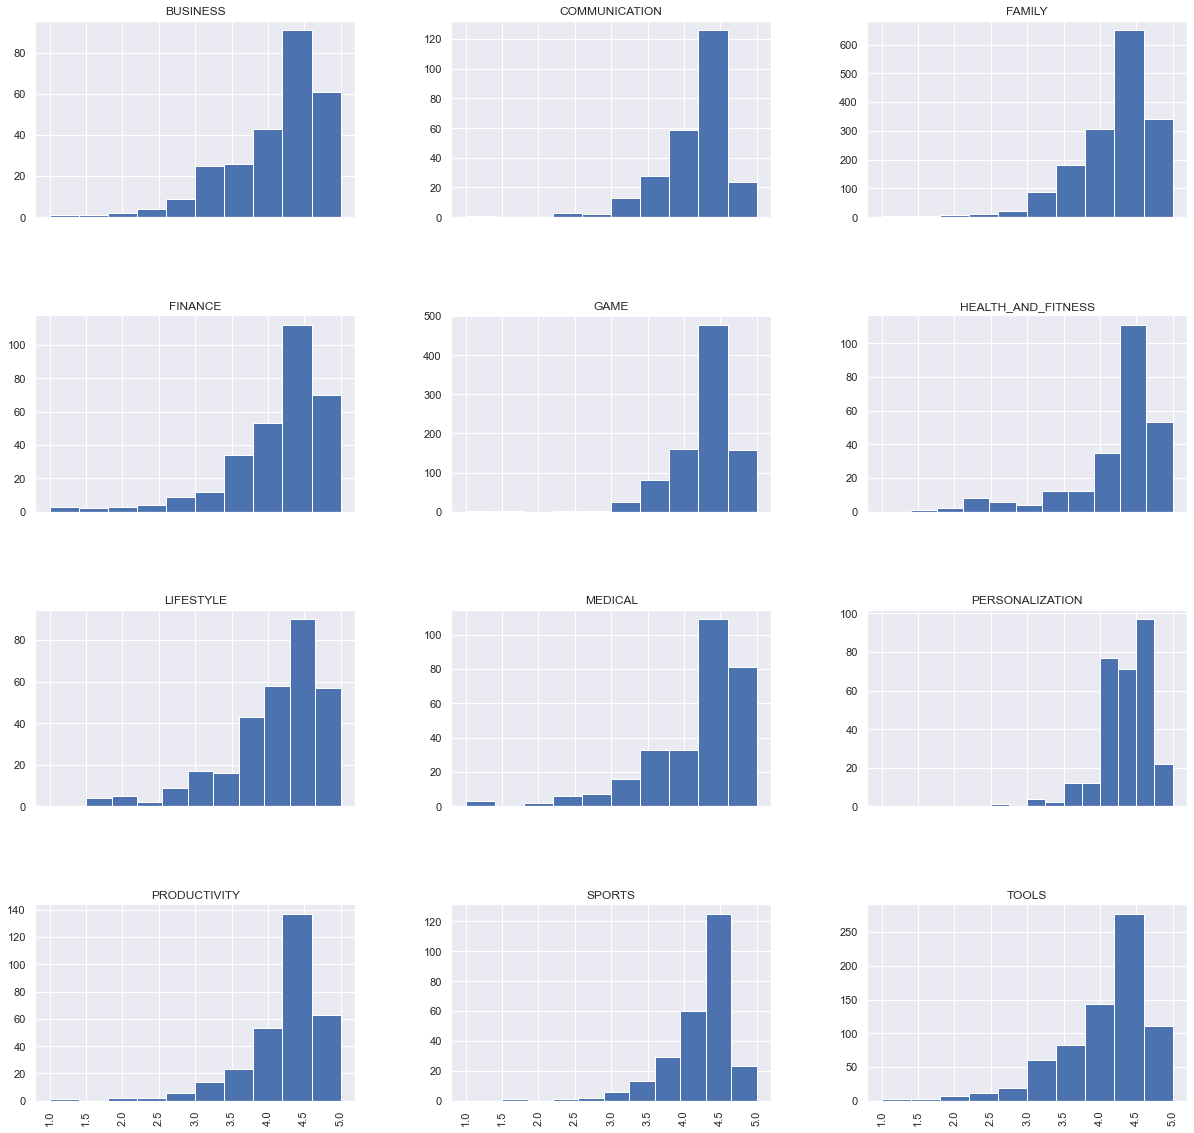

In [10]:
#App ratings across categories
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [15]:
#Above Observations : The average app ratings across categories is significantly different.

#Best performing categories
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.170026786973072


In [11]:
""" 
Above Observations :-
-> Almost all app categories perform decently. Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
-> On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.
-> A few junk apps also exist in the Lifestyle, Family and Finance category.
"""

#Sizing strategy (light vs bulky) - how do app sizes impact the app rating
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

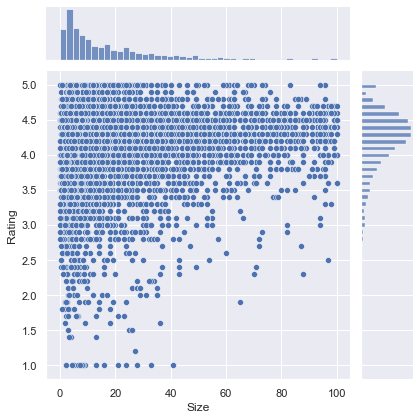

In [21]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])
#ax.set_title('Rating Vs Size')

#Observations : -
#Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

In [12]:

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(groups.Category))))]

subset_df = df[df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

# for category in enumerate(list(set(groups_temp.Category))):
#     print (category)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    #'marker': {'color':c[i]}
    #'text' : df['rating'],
    } for category in enumerate(['GAME', 'FAMILY'])]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

# heavy_categories = [ 'ENTERTAINMENT', 'MEDICAL', 'DATING']

# data = [{
#     'x': groups.loc[df.Category==category]['Rating'], 
#     'type':'scatter',
#     'y' : df['Size'],
#     'name' : category,
#     'mode' : 'markers',
#     'showlegend': True,
#     #'text' : df['rating'],
#     } for category in heavy_categories]

#Rating vs Size

#Observation
""" Most bulky apps ( >50MB) belong to the Game and Family category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose. """

TypeError: '>' not supported between instances of 'str' and 'int'

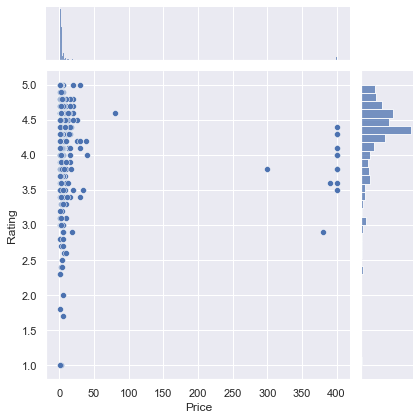

In [23]:
""" Pricing Strategy - Free Vs Paid?
How do app prices impact app rating? """

paid_apps = df[df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

#Most top rated apps are optimally priced between ~1 𝑡𝑜 30 . There are only a very few apps priced above 20$.

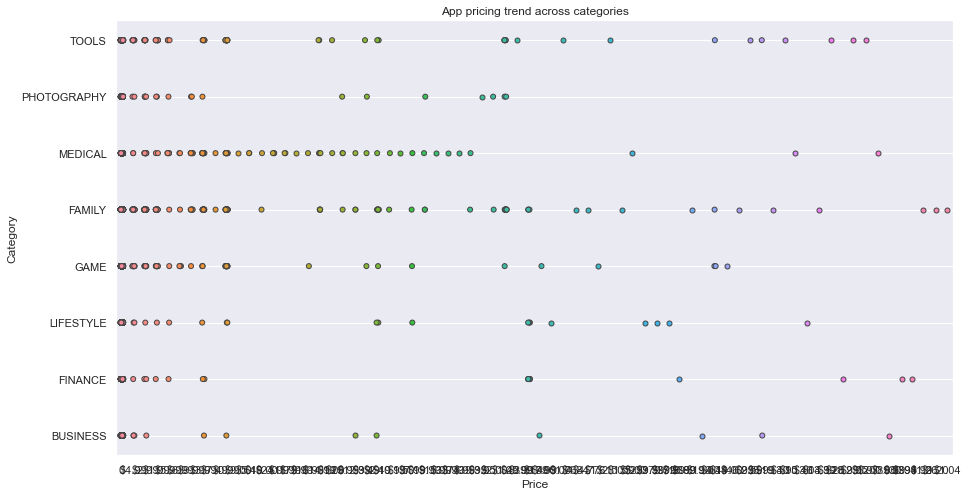

In [13]:
#Current pricing trend - How to price your app?
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')
#Shocking...Apps priced above 250$ !!! * Let's quickly examine what these junk apps are.

In [25]:
print('Junk apps priced above 350$')
df[['Category', 'App']][df.Price > 200]

Junk apps priced above 350$


Category                                App
4197     FAMILY             most expensive app (H)
4362  LIFESTYLE                         💎 I'm rich
4367  LIFESTYLE           I'm Rich - Trump Edition
5351  LIFESTYLE                          I am rich
5354     FAMILY                     I am Rich Plus
5355  LIFESTYLE                      I am rich VIP
5356    FINANCE                  I Am Rich Premium
5357  LIFESTYLE                I am extremely Rich
5358    FINANCE                         I am Rich!
5359    FINANCE                 I am rich(premium)
5362     FAMILY                      I Am Rich Pro
5364    FINANCE     I am rich (Most expensive app)
5366     FAMILY                          I Am Rich
5369    FINANCE                          I am Rich
5373    FINANCE                 I AM RICH PRO PLUS
9917    FINANCE                        Eu Sou Rico
9934  LIFESTYLE  I'm Rich/Eu sou Rico/أنا غني/我很有錢

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<100]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

TypeError: '<' not supported between instances of 'str' and 'int'

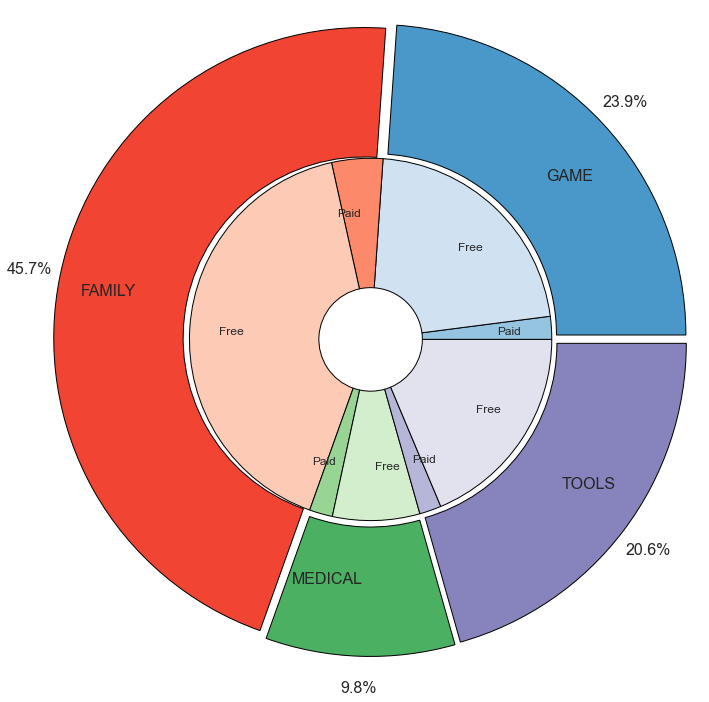

In [27]:
#Obervations :
""" Clearly, Medical and Family apps are the most expensive. Some medical apps extend even upto 80$.
All other apps are priced under 30$.
Surprisingly, all game apps are reasonably priced below 20$.
 """


#Distribution of paid and free apps across categories
# Stacked bar graph for top 5-10 categories - Ratio of paid and free apps
#fig, ax = plt.subplots(figsize=(15,10))

new_df = df.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()
#print(new_df)

# outer_group_names = df['Category'].sort_values().value_counts()[:5].index
# outer_group_values = df['Category'].sort_values().value_counts()[:5].values

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df.App[df.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]


inner_group_names = ['Paid', 'Free'] * 4
inner_group_values = []
#inner_colors = ['#58a27c','#FFD433']


for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Type == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()



#ax = sns.countplot(x="Category", hue="Type", data=new_df)

#df.groupby(['Category', 'Type']).count()['App'].unstack().plot(kind='bar', stacked=True, ax=ax)
#ylabel = plt.ylabel('Number of apps')



In [28]:
#Are paid apps downloaded as much as free apps?
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

#Paid apps have a relatively lower number of downloads than free apps. However, it is not too bad.

In [29]:
#How do the sizes of paid apps and free apps vary?
temp_df = df[df.Type == 'Paid']
temp_df = temp_df[temp_df.Size > 5]
#type_groups = df.groupby('Type')

data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Rating'],
    'type':'scatter',
    'y' : temp_df['Size'],
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

""" 
Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.
Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.
"""

' Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.\nUsers prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market. '

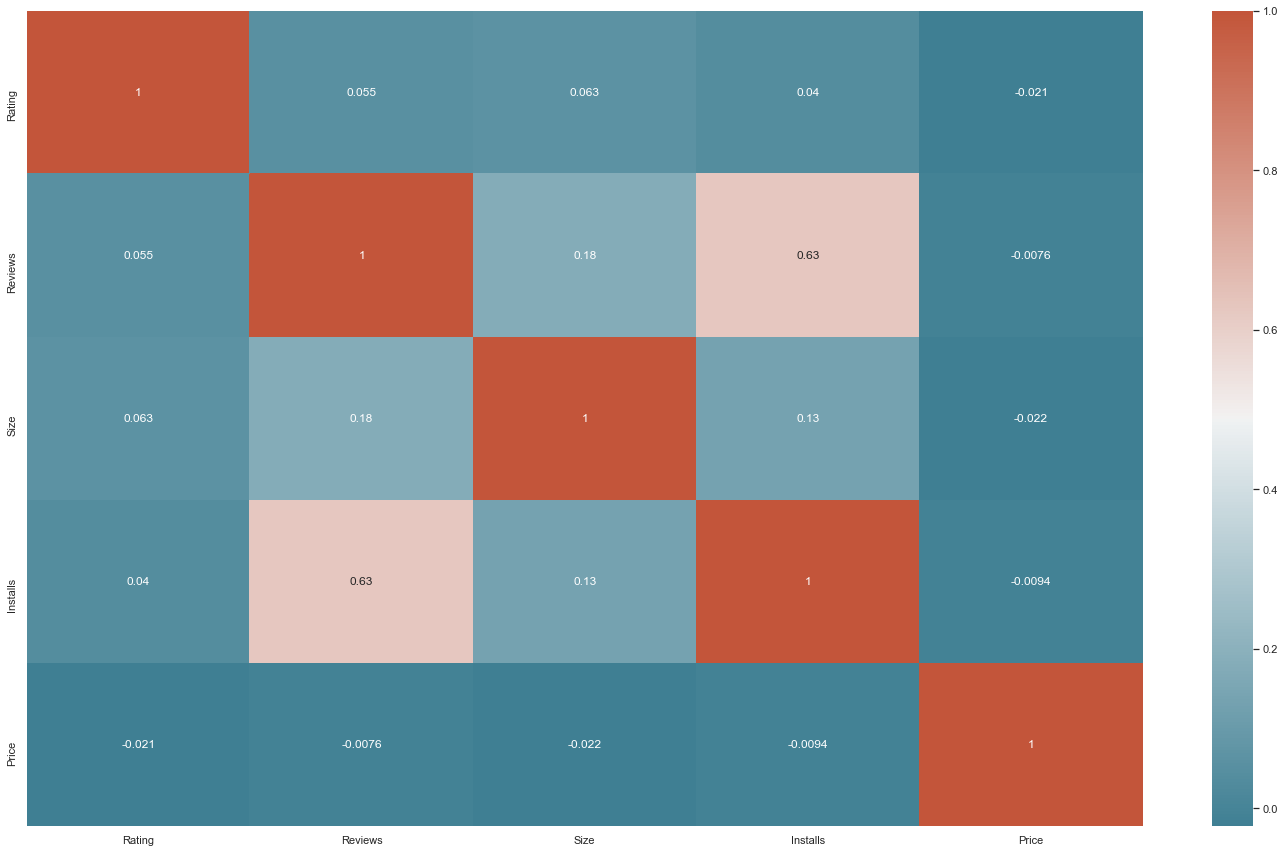

In [30]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = df.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

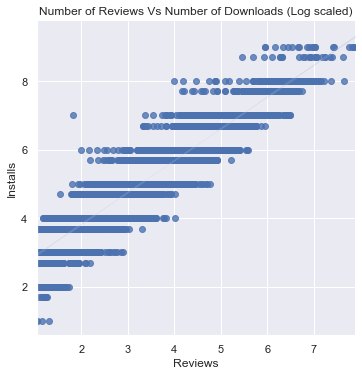

In [31]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

In [32]:
""" 
A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!
"""

" A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.\n\nThis also means that many active users who download an app usually also leave back a review or feedback.\n\nSo, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market! "

In [33]:
#BASIC SENTIMENT ANALYSIS
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [34]:
merged_df = pd.merge(df, reviews_df, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [35]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
#print(new_df)
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)
# new_df = new_df[new_df.Category.isin(['HEALTH_AND_FITNESS', 'GAME', 'FAMILY', 'EDUCATION', 'COMMUNICATION', 
#                                      'ENTERTAINMENT', 'TOOLS', 'SOCIAL', 'TRAVEL_AND_LOCAL'])]
new_df

trace1 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[::3][6:-5],
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5],
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

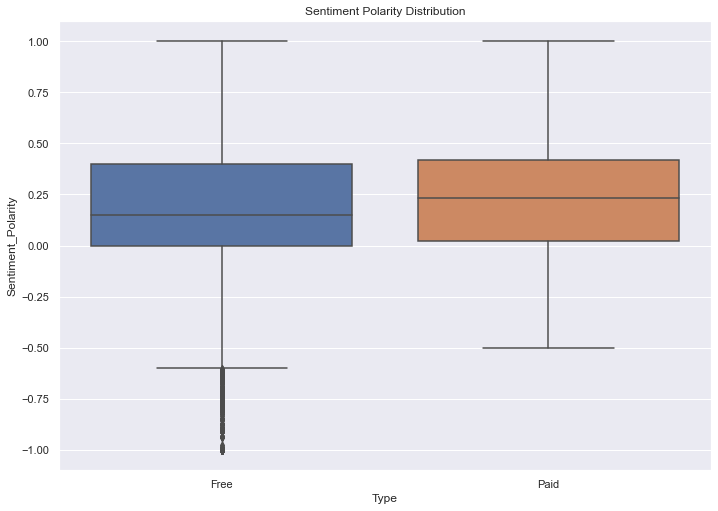

In [36]:
""" Health and Fitness apps perform the best, having more than 85% positive reviews.
On the contrary, many Game and Social apps perform bad leading to 50% positive and 50% negative. """

#merged_df.loc[merged_df.Type=='Free']['Sentiment_Polarity']
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

In [37]:
""" Free apps receive a lot of harsh comments which are indicated as outliers on the negative Y-axis.

Users are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app. """



' Free apps receive a lot of harsh comments which are indicated as outliers on the negative Y-axis.\n\nUsers are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app. '

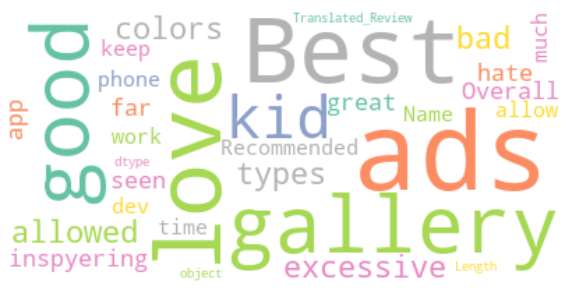

In [42]:
#WORDCLOUD - A quick look on reviews
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="Set2")
# generate word cloud

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
""" ** FREE APPS **

Negative words: ads, bad, hate

Positive words: good, love, best, great """

' ** FREE APPS **\n\nNegative words: ads, bad, hate\n\nPositive words: good, love, best, great '

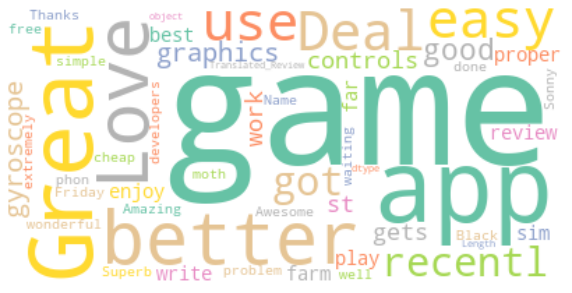

In [44]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [45]:
""" ** PAID APPS **
Negative words: malware, problem
Positive words: great, love, easy """

' ** PAID APPS **\n\nNegative words: malware, problem\n\nPositive words: great, love, easy '

In [ ]:
""" 
CONCLUSION

Average rating of (active) apps on Google Play Store is 4.17.

Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.

Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

Most of the top rated apps are optimally priced between ~1 𝑡𝑜 30  - neither too cheap nor too expensive.

Medical and Family apps are the most expensive and even extend upto 80$.

Users tend to download a given app more if it has been reviewed by a large number of people.

Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.

Users are more grim and harsh while reviewing free apps than paid apps. 
"""